# Projecte final
## Classificació del gèneres musicals

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display


drive.mount ('/content/drive')
%cd '/content/drive/MyDrive/Treball_final/Data/'

Mounted at /content/drive
/content/drive/MyDrive/Treball_final/Data


In [2]:
df = pd.read_csv('features_3_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


* filename: nom del fitxer.

* length: duració de l'àudio (ms).

* chroma_stft: canvis tonals basats en la transformada de Fourier. Com més baix sigui el valor, més energia té repartit en les 12 notes, i com més alt sigui, més energia tindrà en unes determinades notes i, per tant, seran les que més vegades sonin.

* rms: root mean square, indica el volum real de la cançó. 

* spectral_centroid: indica el centre de masses de l’espectrograma, és a dir, quina és la freqüència “mitjana”. Com més alt sigui el valor, més agut i brillant serà la cançó i com més baix, més greu i fosc.

* spectral_bandwidth: diferència entre les freqüències superior i inferior en una banda contínua de freqüències.

* rollof: indica els límits de l’espectre

* zero_crossing_rate: és la freqüència amb la qual la senyal passa de positiu a negatiu o viceversa. És un indicador útil, ja que ens pot estar informant de la quantitat de soroll que hi ha

* harmony: indica l'energia dels harmònics en funció del temps i la freqüència.

* perceptr:  ponderació perceptiva rítmica.

* tempo: bpm de la cançó.

* mfcc1-mfcc20: Coeficients Cepstrals en les Freqüències de Mel. Són coeficients en diferents trams de l’espectre a partir de la transformada de Fourier i un filtre perquè estigui basat en la percepció auditiva humana.


In [3]:
df = df.drop(columns = ['filename', 'length'])

## Visualització de dades

In [4]:
df.label.value_counts()

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

In [5]:
df.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [6]:
y, sr = librosa.load('/content/drive/MyDrive/Treball_final/Data/genres_original/blues/blues.00000.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (Khz):', sr, '\n')

print('Check len audio:', np.shape(y)[0]/sr)

y: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

y shape: (661794,) 

Sample Rate (Khz): 22050 

Check len audio: 30.013333333333332


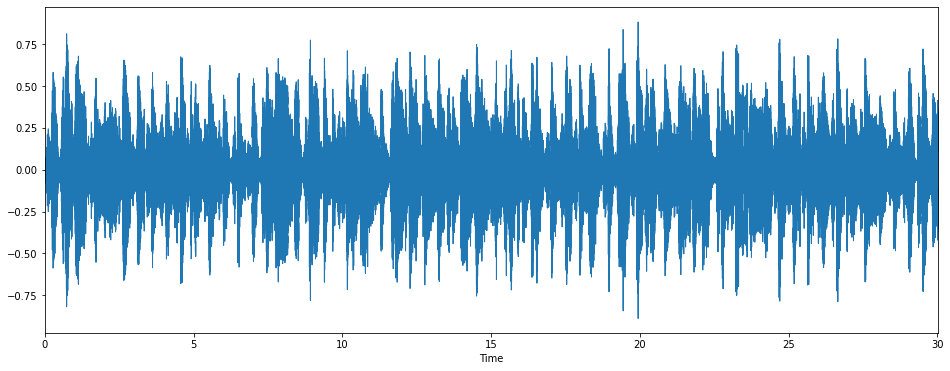

In [7]:
audio_file, _ = librosa.effects.trim(y)
plt.figure(figsize = (16,6))
librosa.display.waveplot(y = audio_file, sr = sr)

The spectogram

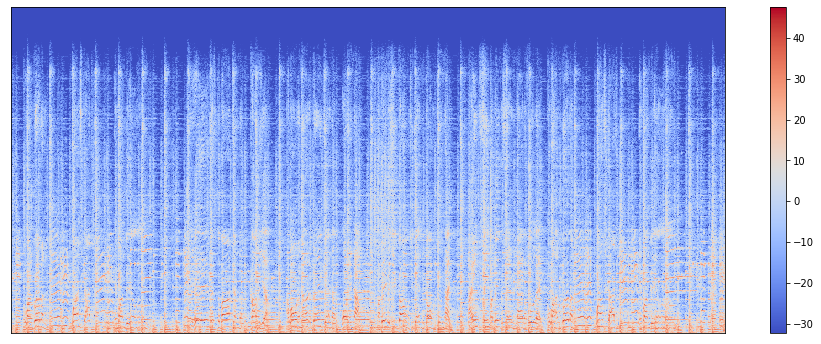

In [8]:
D = np.abs(librosa.stft(audio_file))

DB = librosa.amplitude_to_db(D)

plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr)
plt.colorbar()

Mel Spectrogram

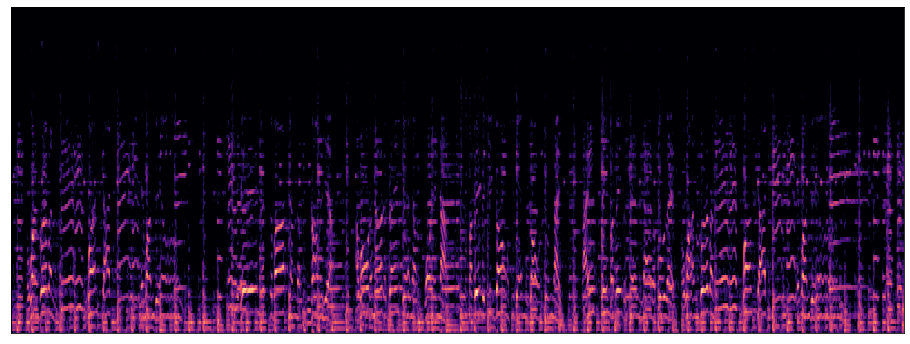

In [9]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr = sr)

As we can see above, there are two features that has a hight correlation with 'rolloff_mean', 'spectral_centroid_mean' and  'spectral_bandwidth_mean', so we can delete there two feature as they are not lineal independent.

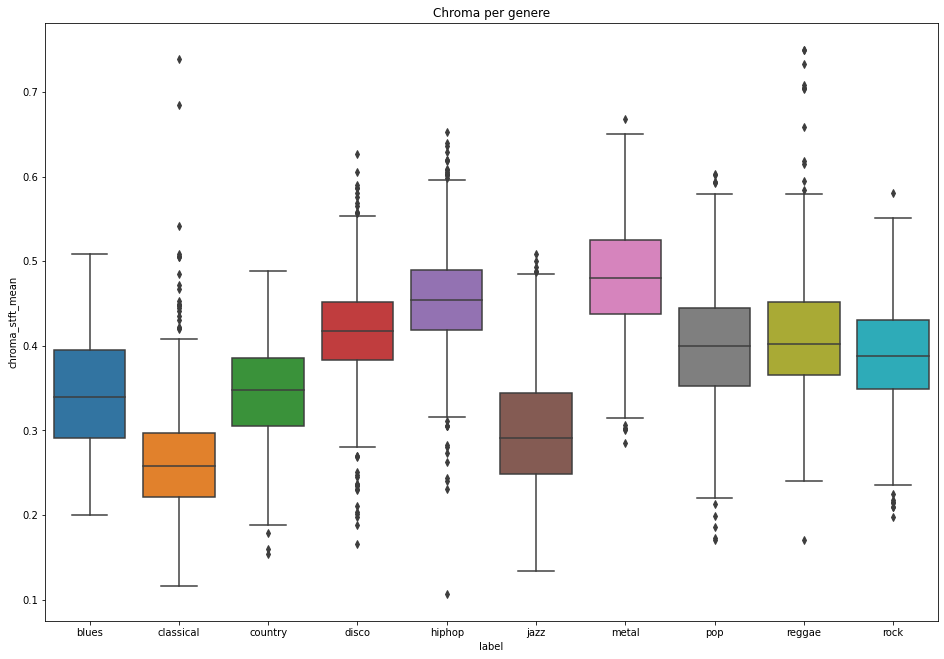

In [10]:
fig = plt.figure(figsize=(16,11))

sns.boxplot(x = df.label, y = df.chroma_stft_mean, data = df)
plt.title('Chroma per genere')
plt.savefig('Chroma.png')

## Preprocessat

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

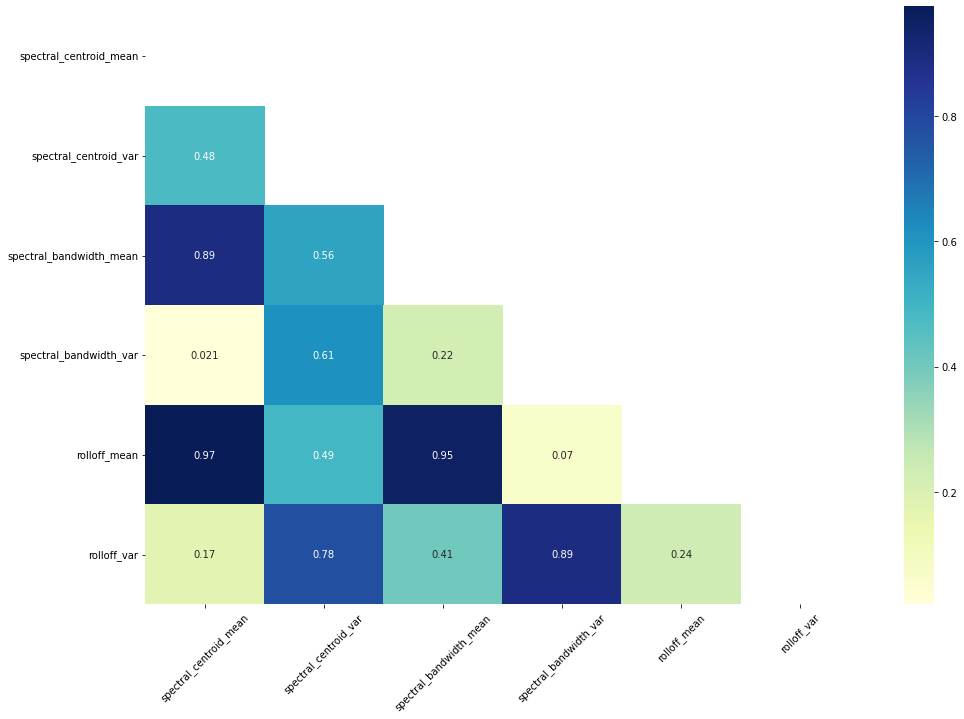

In [11]:
fig = plt.figure(figsize=(16,11))
mask = np.triu(np.ones_like(df.iloc[:, 4:10].corr()))
sns.heatmap((df.iloc[:, 4:10]).corr(), annot=True, mask=mask, cmap="YlGnBu")
plt.xticks(rotation=45)
#plt.savefig('Correlation.png')

In [12]:
df = df.drop(columns=['spectral_bandwidth_mean', 'spectral_centroid_mean'])

In [13]:
print(f'There are {df.isnull().sum().sum()} null values')

There are 0 null values


In [14]:
y = df['label']
X = df.loc[:, df.columns != 'label']

In [15]:
from scipy.stats import shapiro

l={}
t = False
for i in X.columns:
  stat, p = shapiro(X[i])
  if p > 0.05:
    l[i] = p
    t = True

if t:
  print(f'La/les variables que són probable que tinguin una distribució gausiana són les següents:\n\n{l}')
else:
  print('Cap variable té una distribució normal')

Cap variable té una distribució normal


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##PCA

In [16]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [17]:

y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC_1', 'PC_2'])

finalDf = pd.concat([principalDf, y], axis = 1)

np.cumsum(pca.explained_variance_ratio_)

array([0.22667194, 0.41422334])

In [18]:
nums_names = list(X.columns)
attributes_pca = pd.DataFrame({'Attribute' : nums_names, 'PC_1': pca.components_[0], 'PC_2': pca.components_[1]})
attributes_pca

,Attribute,PC_1,PC_2
0,chroma_stft_mean,0.125192,0.293377
1,chroma_stft_var,0.057041,-0.128314
2,rms_mean,0.231489,0.259731
3,rms_var,0.197427,0.045981
4,spectral_centroid_var,0.188327,0.001796
5,spectral_bandwidth_var,0.116026,-0.065386
6,rolloff_mean,0.342752,0.348034
7,rolloff_var,0.201980,-0.067520
8,zero_crossing_rate_mean,0.116925,0.279460
9,zero_crossing_rate_var,0.092423,0.030118


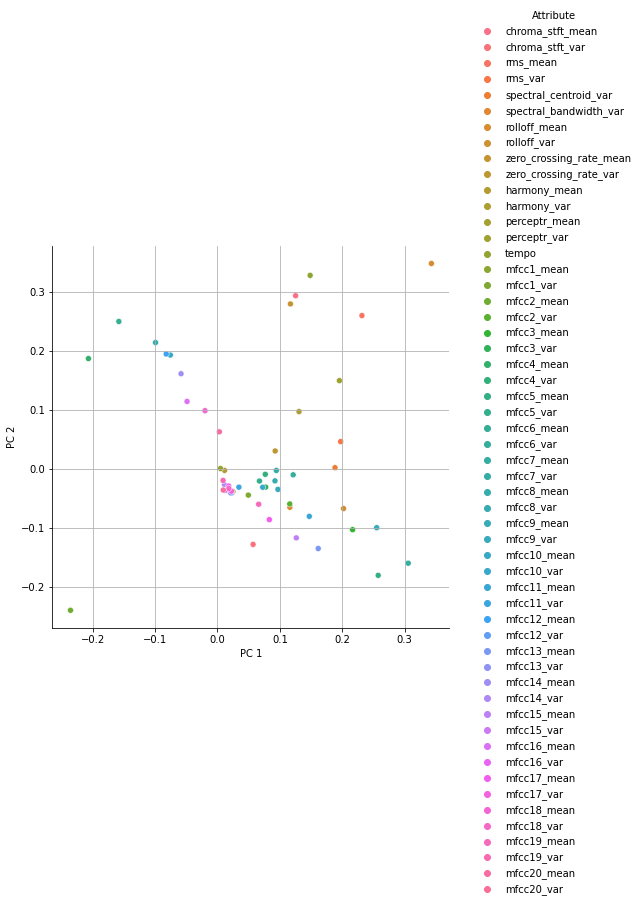

In [19]:
sns.pairplot(data = attributes_pca, x_vars = ['PC_1'], y_vars = ['PC_2'], hue = 'Attribute', 
             height = 6).fig.set_size_inches(9,6)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.grid(True)
plt.show()

Text(0, 0.5, 'Principal Component 2')

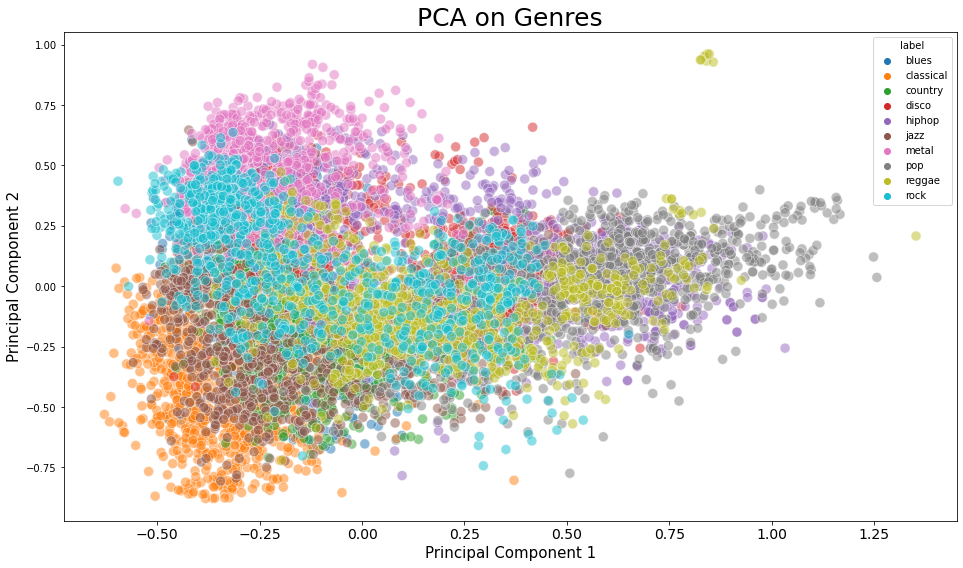

In [20]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "PC_1", y = "PC_2", data = finalDf, hue = "label", alpha = 0.5, s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

In [21]:
principalDf.PC_1.describe()

count    9.990000e+03
mean     2.560514e-17
std      3.557492e-01
min     -6.290379e-01
25%     -2.813082e-01
50%     -1.103136e-01
75%      2.560799e-01
max      1.352396e+00
Name: PC_1, dtype: float64

# Model

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score

from sklearn.metrics import f1_score, confusion_matrix
import eli5
from eli5.sklearn import PermutationImportance

In [24]:
X = df.drop(columns = ['label'])
y = df.label

In [25]:
#Escalem dades
columns = X.columns
X[columns] = MinMaxScaler().fit(X).transform(X)

In [26]:
#Split train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [27]:
#Funció per crear els models
def model_maker(model):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred, average='macro')
  return {'Accuracy': accuracy, 'F1': f1}

In [39]:
dt = model_maker(DecisionTreeClassifier())
print(f'Accuracy Decission Tree: {dt}')
rfc = model_maker(RandomForestClassifier())
print(f'Accuracy Random Forest: {rfc}')
xb = model_maker(XGBClassifier())
print(f'XGB: {xb}')
gnb = model_maker(GaussianNB())
print(f'Naive Bayes: {gnb}')
lr = model_maker(LogisticRegression())
print(f'Logistic Regression: {lr}')
knn = model_maker(KNeighborsClassifier())
print(f'KNN: {knn}')
svc = model_maker(SVC())
print(f'SVC: {svc}')
mpl = model_maker(MLPClassifier())
print(f'Neural Network: {mpl}')

Accuracy Decission Tree: {'Accuracy': 0.6591591591591591, 'F1': 0.6540591716584723}
Accuracy Random Forest: {'Accuracy': 0.8703703703703703, 'F1': 0.8681202435777629}
XGB: {'Accuracy': 0.7997997997997998, 'F1': 0.7944137402670718}
Naive Bayes: {'Accuracy': 0.551051051051051, 'F1': 0.5323638364652397}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression: {'Accuracy': 0.7022022022022022, 'F1': 0.6941774165934008}
KNN: {'Accuracy': 0.9034034034034034, 'F1': 0.901876487421512}
SVC: {'Accuracy': 0.7602602602602603, 'F1': 0.7551577242311792}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Neural Network: {'Accuracy': 0.7537537537537538, 'F1': 0.7469811655738718}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [29]:
#Creem un df veure l'accuracy i el F1
models = np.array(['Decission Tree', 'Random Forest', 'XGB Classifier', 'GaussianNB', 'Logistic Regression', 'KNearest Neighbors', 'Support Vector Machine', 'MLP Classifier'])
acc = np.array([dt, rfc, xb, gnb, lr, knn, svc, mpl])

dfR = pd.DataFrame.from_records(acc) #Afegim els resultates en un df nou
dfR.insert(loc = 0, column = 'Models', value = models) #Afegim els noms dels models i la col·loquem a l'inici del df

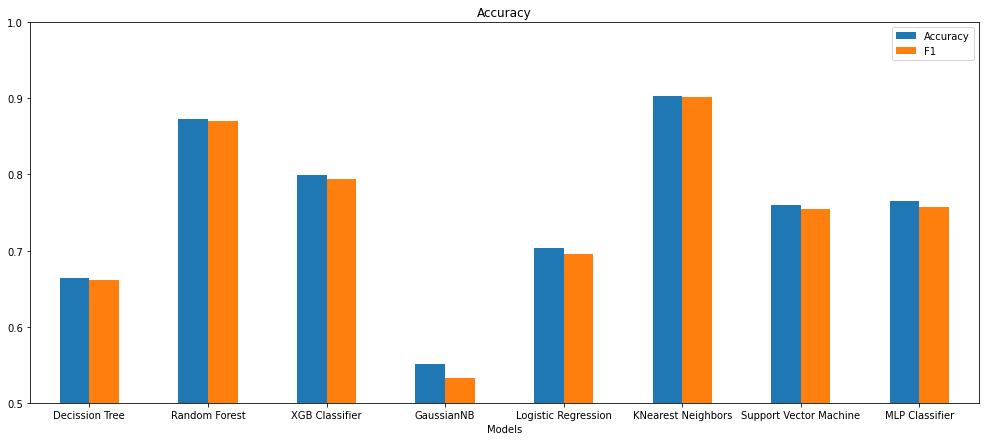

In [30]:
#Creem una gràfica en la que per representar la informació anterior
models = np.array(['Decission Tree', 'Random Forest', 'XGB Classifier', 'GaussianNB', 'SGD Classifier', 'Logistic Regression', 'KNearest Neighbors', 'Support Vector Machine', 'MLP Classifier'])
acc = np.array([dt, rfc, xb, gnb, lr, knn, svc, mpl])


dfR.plot(x="Models", y=["Accuracy", "F1"], kind="bar",figsize=(17,7))
plt.title('Accuracy')
plt.xticks(rotation=0)
plt.ylim([0.5, 1])
plt.savefig('Models accuracy')

Veiem que els dos models amb un major accuracy són KNearest Neighbors i Random Forest. Anem a comprobar que no tenen overfitting amb una validació creuada.

In [35]:
knn_cv = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')
knn_cv.mean()

0.8870122205602533

In [36]:
rf_cv = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5, scoring='accuracy')
rf_cv.mean()

0.8490994449753874

Veiem que KNN segueix sent el millor model, a continuació busquem els millors paràmetres

In [44]:
grid ={'leaf_size': list(range(1,50)),
      'n_neighbors': list(range(1,30)),
      'p': [1,2],
       'weights': ['uniform', 'distance'],
       'metric': ['minkowski', 'euclidean', 'manhattan']} 

model  = KNeighborsClassifier()
knn_bp = RandomizedSearchCV(model, grid, cv=5, n_jobs=-1, refit = True, n_iter=50)
knn_bp.fit(X_train, y_train)
score_bp = knn_bp.score(X_test,y_test)
print(score_bp)
print(knn_bp.best_params_)

0.9414414414414415
{'weights': 'distance', 'p': 1, 'n_neighbors': 2, 'metric': 'minkowski', 'leaf_size': 34}


In [ ]:
pred = knn_bp.predict(X_test)
f1 = f1_score(y_test, pred, average='macro')
f1

0.9401720500501867

In [55]:
knn['Accuracy']

0.9034034034034034

In [56]:
print(f'Amb el hyperparàmetres, el model ha obtingut un, {round(score_bp / knn["Accuracy"], 4)}% més de precissió')

Amb el hyperparàmetres, el model ha obtingut un, 1.0421% més de precissió


Matriu de confusió

In [ ]:
conf = confusion_matrix(y_test, pred)

In [ ]:
labels = ['Blues', 'Jazz', 'Metal', 'Pop', 'Reggae', 'Disco', 'Classical', 'Hip hop', 'Rock', 'Country']

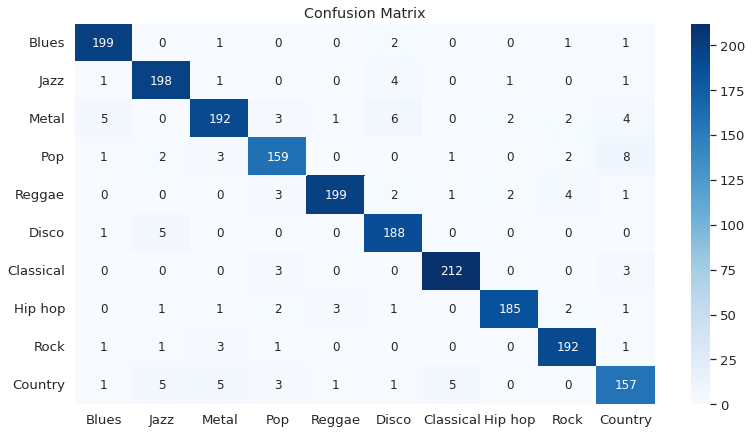

In [ ]:
df_cm = pd.DataFrame(conf, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize=(13,7))
sns.set(font_scale=1.2) # for label size
fig = sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g', cmap=plt.cm.Blues) # font size
plt.title('Confusion Matrix')

plt.show()
fig = fig.get_figure()
fig.savefig("Confusion.png") 

Feature Importance

In [57]:
perm = PermutationImportance(estimator=knn_bp, random_state=1)
perm.fit(X_test, y_test)
impo = eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist(), include_styles=False)


In [58]:
impo

Weight,Feature
0.0128 ± 0.0021,mfcc3_mean
0.0121 ± 0.0043,rms_mean
0.0114 ± 0.0045,mfcc5_mean
0.0100 ± 0.0040,mfcc4_mean
0.0097 ± 0.0046,mfcc6_mean
0.0087 ± 0.0024,perceptr_mean
0.0081 ± 0.0042,chroma_stft_mean
0.0081 ± 0.0026,mfcc13_mean
0.0081 ± 0.0037,mfcc9_mean
0.0079 ± 0.0042,tempo


As we see above the more representative features for the model traning are mfcc_mean, rms_mean and mfcc5_mean.